# Series de tiempo

In [43]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./db/covid/covid_19_data.csv")
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
98247,98248,08/29/2020,Zaporizhia Oblast,Ukraine,2020-08-30 04:28:22,1520.0,25.0,883.0
98248,98249,08/29/2020,Zeeland,Netherlands,2020-08-30 04:28:22,1048.0,72.0,0.0
98249,98250,08/29/2020,Zhejiang,Mainland China,2020-08-30 04:28:22,1277.0,1.0,1268.0
98250,98251,08/29/2020,Zhytomyr Oblast,Ukraine,2020-08-30 04:28:22,3155.0,61.0,1837.0


In [3]:
df["ObservationDate"] = pd.to_datetime(df["ObservationDate"])

In [4]:
list(df)

['SNo',
 'ObservationDate',
 'Province/State',
 'Country/Region',
 'Last Update',
 'Confirmed',
 'Deaths',
 'Recovered']

In [5]:
df = df[[ 'ObservationDate',
 'Country/Region',
 'Confirmed',
 'Deaths',
 'Recovered']]

In [6]:
df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.0,0.0,0.0
1,2020-01-22,Mainland China,14.0,0.0,0.0
2,2020-01-22,Mainland China,6.0,0.0,0.0
3,2020-01-22,Mainland China,1.0,0.0,0.0
4,2020-01-22,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
98247,2020-08-29,Ukraine,1520.0,25.0,883.0
98248,2020-08-29,Netherlands,1048.0,72.0,0.0
98249,2020-08-29,Mainland China,1277.0,1.0,1268.0
98250,2020-08-29,Ukraine,3155.0,61.0,1837.0


In [7]:
df.dtypes

ObservationDate    datetime64[ns]
Country/Region             object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [8]:
df_time = df.groupby("ObservationDate").sum()
df_time.head(5)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0


In [9]:
df1 = df_time["Confirmed"].iloc[10:15]
df2 = df_time["Deaths"].iloc[12:17]

In [10]:
df1 - df2

ObservationDate
2020-02-01        NaN
2020-02-02        NaN
2020-02-03    19455.0
2020-02-04    23400.0
2020-02-05    27072.0
2020-02-06        NaN
2020-02-07        NaN
dtype: float64

In [11]:
df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.0,0.0,0.0
1,2020-01-22,Mainland China,14.0,0.0,0.0
2,2020-01-22,Mainland China,6.0,0.0,0.0
3,2020-01-22,Mainland China,1.0,0.0,0.0
4,2020-01-22,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
98247,2020-08-29,Ukraine,1520.0,25.0,883.0
98248,2020-08-29,Netherlands,1048.0,72.0,0.0
98249,2020-08-29,Mainland China,1277.0,1.0,1268.0
98250,2020-08-29,Ukraine,3155.0,61.0,1837.0


In [12]:
df_diff = df_time.diff()
df_diff = df_diff.fillna({'Confirmed': 555.0,
 'Deaths':17.0,
 'Recovered': 28.0})
df_diff

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0
2020-01-25,497.0,16.0,3.0
2020-01-26,680.0,14.0,13.0
...,...,...,...
2020-08-25,241773.0,6392.0,232939.0
2020-08-26,287686.0,6282.0,224250.0
2020-08-27,275793.0,5890.0,202840.0


In [13]:
df_time.diff().mean()

Confirmed    113617.731818
Deaths         3829.463636
Recovered     74589.677273
dtype: float64

In [14]:
df_time.head(1).to_dict()

{'Confirmed': {Timestamp('2020-01-22 00:00:00'): 555.0},
 'Deaths': {Timestamp('2020-01-22 00:00:00'): 17.0},
 'Recovered': {Timestamp('2020-01-22 00:00:00'): 28.0}}

In [15]:
df_diff.cumsum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0
...,...,...,...
2020-08-25,23889150.0,819414.0,15570191.0
2020-08-26,24176836.0,825696.0,15794441.0
2020-08-27,24452629.0,831586.0,15997281.0


In [16]:
df_diff.resample("7D").sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,5578.0,131.0,107.0
2020-01-29,18314.0,361.0,745.0
2020-02-05,20911.0,621.0,3831.0
2020-02-12,30335.0,894.0,9669.0
2020-02-19,5277.0,701.0,13553.0
2020-02-26,12429.0,452.0,20324.0
2020-03-04,25738.0,1102.0,16175.0
2020-03-11,78586.0,3643.0,16436.0
2020-03-18,220794.0,10710.0,26859.0


In [17]:
df_diff.resample("W-Sun").sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-26,2118.0,56.0,52.0
2020-02-02,14669.0,306.0,420.0
2020-02-09,23364.0,544.0,2772.0
2020-02-16,31075.0,864.0,7621.0
2020-02-23,7759.0,699.0,12529.0
2020-03-01,9386.0,527.0,19322.0
2020-03-08,21464.0,807.0,17979.0
2020-03-15,57612.0,2637.0,15339.0
2020-03-22,169675.0,8183.0,21209.0


In [18]:
df_diff.resample("M").sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9925.0,213.0,222.0
2020-02-29,76088.0,2728.0,39560.0
2020-03-31,771474.0,39166.0,138246.0
2020-04-30,2399359.0,191281.0,836725.0
2020-05-31,2910100.0,138647.0,1626576.0
2020-06-30,4308892.0,139218.0,2711943.0
2020-07-31,7123998.0,168247.0,5015868.0
2020-08-31,7396620.0,162999.0,6040617.0


In [19]:
df_diff.resample("M").count()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,10,10,10
2020-02-29,29,29,29
2020-03-31,31,31,31
2020-04-30,30,30,30
2020-05-31,31,31,31
2020-06-30,30,30,30
2020-07-31,31,31,31
2020-08-31,29,29,29


In [20]:
df_diff.resample("12h").sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,0.0,0.0,0.0
2020-01-23 00:00:00,98.0,1.0,2.0
2020-01-23 12:00:00,0.0,0.0,0.0
2020-01-24 00:00:00,288.0,8.0,6.0
...,...,...,...
2020-08-27 00:00:00,275793.0,5890.0,202840.0
2020-08-27 12:00:00,0.0,0.0,0.0
2020-08-28 00:00:00,281819.0,5538.0,200884.0


In [21]:
df_diff.resample("12h").mean()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,98.0,1.0,2.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,288.0,8.0,6.0
...,...,...,...
2020-08-27 00:00:00,275793.0,5890.0,202840.0
2020-08-27 12:00:00,NaN,NaN,NaN
2020-08-28 00:00:00,281819.0,5538.0,200884.0


In [22]:
df_cum = df_time.resample("12h").sum(min_count=1)
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-08-27 00:00:00,24452629.0,831586.0,15997281.0
2020-08-27 12:00:00,NaN,NaN,NaN
2020-08-28 00:00:00,24734448.0,837124.0,16198165.0


In [23]:
df_cum.bfill() # Te llena los valores faltantes con el valor siguiente

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,653.0,18.0,30.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,941.0,26.0,36.0
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-08-27 00:00:00,24452629.0,831586.0,15997281.0
2020-08-27 12:00:00,24734448.0,837124.0,16198165.0
2020-08-28 00:00:00,24734448.0,837124.0,16198165.0


In [24]:
df_cum.ffill()# Te llena los valores faltantes con el valor anterior

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,555.0,17.0,28.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,653.0,18.0,30.0
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-08-27 00:00:00,24452629.0,831586.0,15997281.0
2020-08-27 12:00:00,24452629.0,831586.0,15997281.0
2020-08-28 00:00:00,24734448.0,837124.0,16198165.0


In [25]:
df_cum.fillna(-1000)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,-1000.0,-1000.0,-1000.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,-1000.0,-1000.0,-1000.0
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-08-27 00:00:00,24452629.0,831586.0,15997281.0
2020-08-27 12:00:00,-1000.0,-1000.0,-1000.0
2020-08-28 00:00:00,24734448.0,837124.0,16198165.0


In [26]:
df_cum = df_cum.interpolate() # Valor medio
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,604.0,17.5,29.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,797.0,22.0,33.0
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-08-27 00:00:00,24452629.0,831586.0,15997281.0
2020-08-27 12:00:00,24593538.5,834355.0,16097723.0
2020-08-28 00:00:00,24734448.0,837124.0,16198165.0


In [27]:
df_cum["rate"] = 1 - df_cum["Deaths"]/df_cum["Confirmed"]
df_cum

,Confirmed,Deaths,Recovered,rate
ObservationDate,,,,
2020-01-22 00:00:00,555.0,17.0,28.0,0.969369
2020-01-22 12:00:00,604.0,17.5,29.0,0.971026
2020-01-23 00:00:00,653.0,18.0,30.0,0.972435
2020-01-23 12:00:00,797.0,22.0,33.0,0.972396
2020-01-24 00:00:00,941.0,26.0,36.0,0.972370
...,...,...,...,...
2020-08-27 00:00:00,24452629.0,831586.0,15997281.0,0.965992
2020-08-27 12:00:00,24593538.5,834355.0,16097723.0,0.966074
2020-08-28 00:00:00,24734448.0,837124.0,16198165.0,0.966156


In [28]:
df_cum = df_cum.reset_index()
df_cum

,ObservationDate,Confirmed,Deaths,Recovered,rate
0,2020-01-22 00:00:00,555.0,17.0,28.0,0.969369
1,2020-01-22 12:00:00,604.0,17.5,29.0,0.971026
2,2020-01-23 00:00:00,653.0,18.0,30.0,0.972435
3,2020-01-23 12:00:00,797.0,22.0,33.0,0.972396
4,2020-01-24 00:00:00,941.0,26.0,36.0,0.972370
...,...,...,...,...,...
436,2020-08-27 00:00:00,24452629.0,831586.0,15997281.0,0.965992
437,2020-08-27 12:00:00,24593538.5,834355.0,16097723.0,0.966074
438,2020-08-28 00:00:00,24734448.0,837124.0,16198165.0,0.966156
439,2020-08-28 12:00:00,24865452.0,839811.5,16303961.0,0.966226


In [30]:
df_cum.groupby(pd.Grouper(key="ObservationDate", freq="M"))[["rate"]].mean() # Grouper solo se usa en series de tiempo

,rate
ObservationDate,
2020-01-31,0.974594
2020-02-29,0.973562
2020-03-31,0.960070
2020-04-30,0.936029
2020-05-31,0.933422
2020-06-30,0.945713
2020-07-31,0.957037
2020-08-31,0.964106


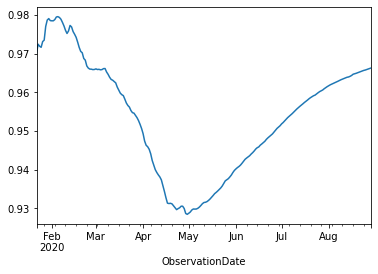

In [31]:
sr = df_cum.groupby(pd.Grouper(key="ObservationDate", freq="1D"))["rate"].mean()
sr.plot()

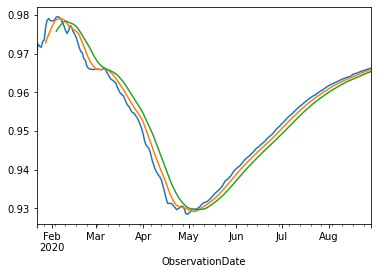

In [35]:
sr.plot()
sr.rolling(window=7).mean().plot()
sr.rolling(window=14).mean().plot()

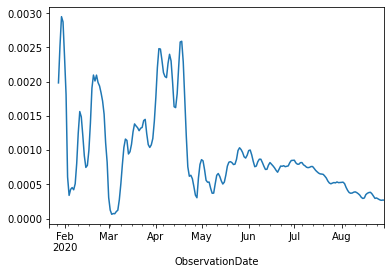

In [37]:
sr.rolling(window=7).apply(lambda x: np.std(x)).plot()


In [39]:
df.groupby("Country/Region")["Confirmed"].max().sort_values(ascending=False)

Country/Region
Brazil             801422.0
India              764281.0
US                 702038.0
South Africa       622551.0
Russia             405843.0
                     ...   
Gambia, The             1.0
East Timor              1.0
Curacao                 1.0
Channel Islands         1.0
 Azerbaijan             1.0
Name: Confirmed, Length: 223, dtype: float64

In [40]:
df_time = df.groupby(["Country/Region", pd.Grouper(key="ObservationDate", freq="1D")]).sum()
df_time

Confirmed  Deaths  Recovered
Country/Region                 ObservationDate                              
 Azerbaijan                    2020-02-28             1.0     0.0        0.0
('St. Martin',)                2020-03-10             2.0     0.0        0.0
Afghanistan                    2020-02-24             1.0     0.0        0.0
                               2020-02-25             1.0     0.0        0.0
                               2020-02-26             1.0     0.0        0.0
...                                                   ...     ...        ...
occupied Palestinian territory 2020-03-12             0.0     0.0        0.0
                               2020-03-14             0.0     0.0        0.0
                               2020-03-15             0.0     0.0        0.0
                               2020-03-16             0.0     0.0        0.0
                               2020-03-17             0.0     0.0        0.0

[34081 rows x 3 columns]

In [41]:
df_brazil = df_time.loc["Brazil",:]
df_brazil

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-23,0.0,0.0,0.0
2020-02-26,1.0,0.0,0.0
2020-02-27,1.0,0.0,0.0
2020-02-28,1.0,0.0,0.0
2020-02-29,2.0,0.0,0.0
...,...,...,...
2020-08-25,3669995.0,116580.0,3032551.0
2020-08-26,3717156.0,117665.0,3082447.0
2020-08-27,3761391.0,118649.0,3122846.0


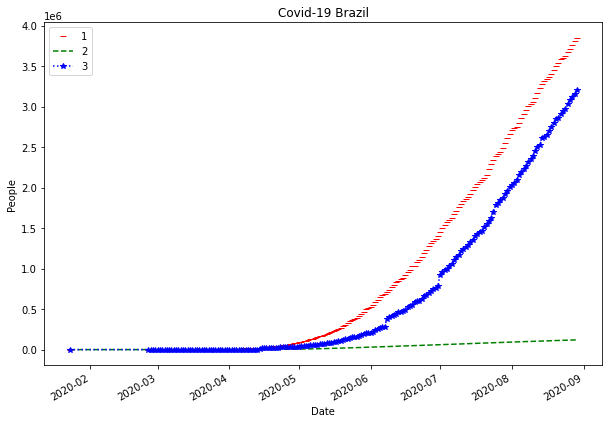

In [48]:
ax=df_brazil.plot(figsize=(10,7), 
               title="Covid-19 Brazil", 
               legend=False,
               style=["r_","g--","b:*"])
ax.legend(["1","2","3"])
plt.xlabel("Date")
plt.ylabel("People")
plt.show()

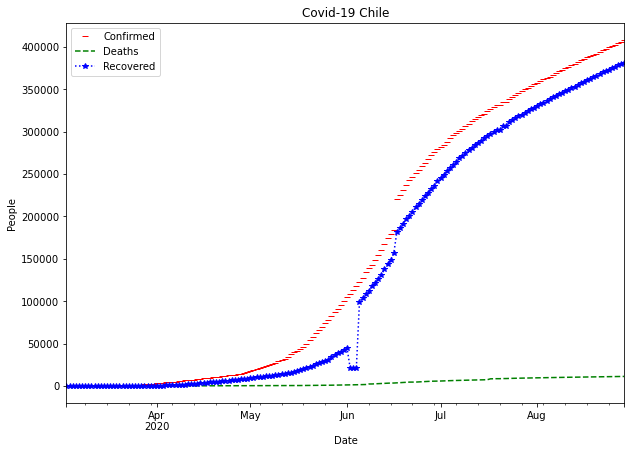

In [51]:

ax=df_time.loc["Chile",:].plot(figsize=(10,7), 
               title="Covid-19 Chile", 
               legend=True,
               style=["r_","g--","b:*"])
plt.xlabel("Date")
plt.ylabel("People")
plt.show()

In [53]:
df_monthly = df_brazil.resample("M").max()
df_monthly

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,0.0,0.0,0.0
2020-02-29,2.0,0.0,0.0
2020-03-31,5717.0,201.0,127.0
2020-04-30,87187.0,6006.0,35935.0
2020-05-31,514849.0,29314.0,206555.0
2020-06-30,1402041.0,59594.0,788318.0
2020-07-31,2662485.0,92475.0,2008854.0
2020-08-31,3846153.0,120262.0,3202185.0


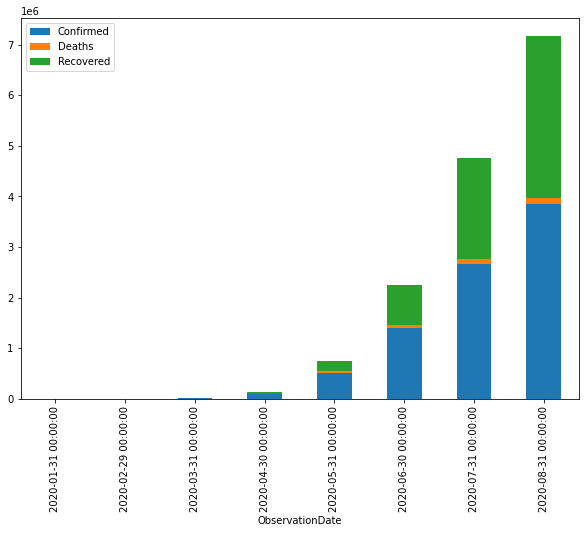

In [55]:
df_monthly.plot(figsize=(10,7), kind="bar", stacked=True)

In [57]:
df_monthly["Traitment"] = df_monthly["Confirmed"] - df_monthly["Deaths"] - df_monthly["Recovered"]
df_monthly.T

ObservationDate,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31
Confirmed,0.0,2.0,5717.0,87187.0,514849.0,1402041.0,2662485.0,3846153.0
Deaths,0.0,0.0,201.0,6006.0,29314.0,59594.0,92475.0,120262.0
Recovered,0.0,0.0,127.0,35935.0,206555.0,788318.0,2008854.0,3202185.0
Traitment,0.0,2.0,5389.0,45246.0,278980.0,554129.0,561156.0,523706.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2034e448e0>,
      dtype=object)

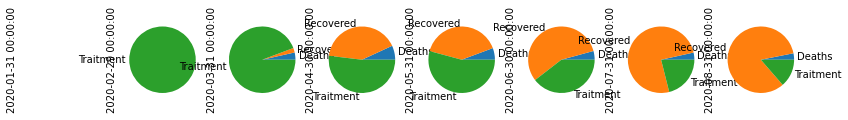

In [71]:
df_monthly[["Deaths","Recovered","Traitment"]].T.plot(figsize=(14,16), kind="pie", subplots=True, legend=False)

In [73]:
df_brazil["rate"] = 1 - df_brazil["Deaths"]/df_brazil["Confirmed"]

In [74]:
df_brazil

,Confirmed,Deaths,Recovered,rate
ObservationDate,,,,
2020-01-23,0.0,0.0,0.0,NaN
2020-02-26,1.0,0.0,0.0,1.000000
2020-02-27,1.0,0.0,0.0,1.000000
2020-02-28,1.0,0.0,0.0,1.000000
2020-02-29,2.0,0.0,0.0,1.000000
...,...,...,...,...
2020-08-25,3669995.0,116580.0,3032551.0,0.968234
2020-08-26,3717156.0,117665.0,3082447.0,0.968345
2020-08-27,3761391.0,118649.0,3122846.0,0.968456


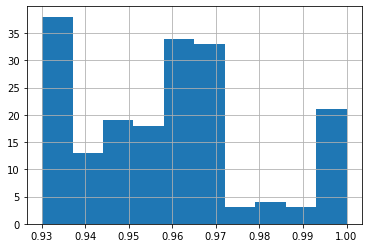

In [75]:
df_brazil["rate"].hist(bins=10)

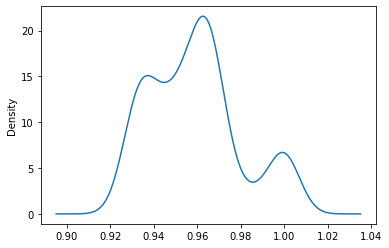

In [81]:
df_brazil["rate"].plot(kind="kde")